In [1]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
print('Current Directory: '+os.getcwd())

CSV_path = 'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Temperature Characterization Test\Temp data logging and processing\Arduino_CSV'
CSV_corrected_path = CSV_path + '\corrected'
print(CSV_corrected_path)

Current Directory: C:\Users\abhim\Documents\Jupyter Notebooks\FGDOS Temperature Characterization Testing\Dummy tests
E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Temperature Characterization Test\Temp data logging and processing\Arduino_CSV\corrected


In [4]:
file_s1 ='FGDOS_03F_HIGH_TEMP_CHAR_MOCK_Apr_19_17-45-50_s1.csv'
file_s2 ='FGDOS_03F_HIGH_TEMP_CHAR_MOCK_Apr_19_17-45-50_s2.csv'
print(file_s1)
print(file_s2)
df_s1 = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Temperature Characterization Test\Temp data logging and processing\Arduino_CSV\corrected'+ '\\'+ file_s1 ,encoding='ISO-8859-1')
df_s2 = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Temperature Characterization Test\Temp data logging and processing\Arduino_CSV\corrected'+ '\\'+ file_s2 ,encoding='ISO-8859-1')


FGDOS_03F_HIGH_TEMP_CHAR_MOCK_Apr_19_17-45-50_s1.csv
FGDOS_03F_HIGH_TEMP_CHAR_MOCK_Apr_19_17-45-50_s2.csv


In [7]:
s1 = df_s1.to_numpy()
s2 = df_s2.to_numpy()
df_s1.head()
df_s2.head()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby,Hot Junction Temperature (C),Cold Junction Temperature (C),ADC Value
0,1.0004,2,85,82008,81336,0,7.63,h,0,0,22.56,23.25,-42
1,1269.4348,2,86,82038,81375,0,7.63,h,0,0,22.56,23.00,-42
2,2539.0385,2,86,82061,81413,0,7.63,h,0,0,22.56,23.50,-42
3,3807.6249,2,86,82092,81382,0,7.63,h,0,0,22.56,23.25,-42
4,5075.7491,2,86,82015,81298,0,7.63,h,0,0,22.56,23.25,-44


In [10]:
df_s1.tail()
df_s2.tail()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby,Hot Junction Temperature (C),Cold Junction Temperature (C),ADC Value
62,87572.2709,2,86,81771,81100,0,7.63,h,0,0,22.56,23.25,-44
63,90110.5347,2,86,81756,81108,0,7.63,h,0,0,22.56,23.00,-44
64,91380.0553,2,86,81771,81100,0,7.63,h,0,0,22.56,23.25,-44
65,92649.1518,2,86,81810,81108,0,7.63,h,0,0,22.56,23.25,-42
66,93918.2305,2,86,81794,81108,0,7.63,h,0,0,22.56,23.25,-42


In [12]:
s2[s2[:,3]<90000]

array([[143379.8781, 2, 84, ..., 'h', 0, 0],
       [143645.8869, 2, 84, ..., 'h', 0, 0],
       [143907.4173, 2, 84, ..., 'h', 0, 0],
       ...,
       [348007.3237, 2, 85, ..., 'h', 0, 0],
       [348269.2464, 2, 85, ..., 'h', 0, 0],
       [348666.6585, 2, 85, ..., 'h', 0, 0]], dtype=object)

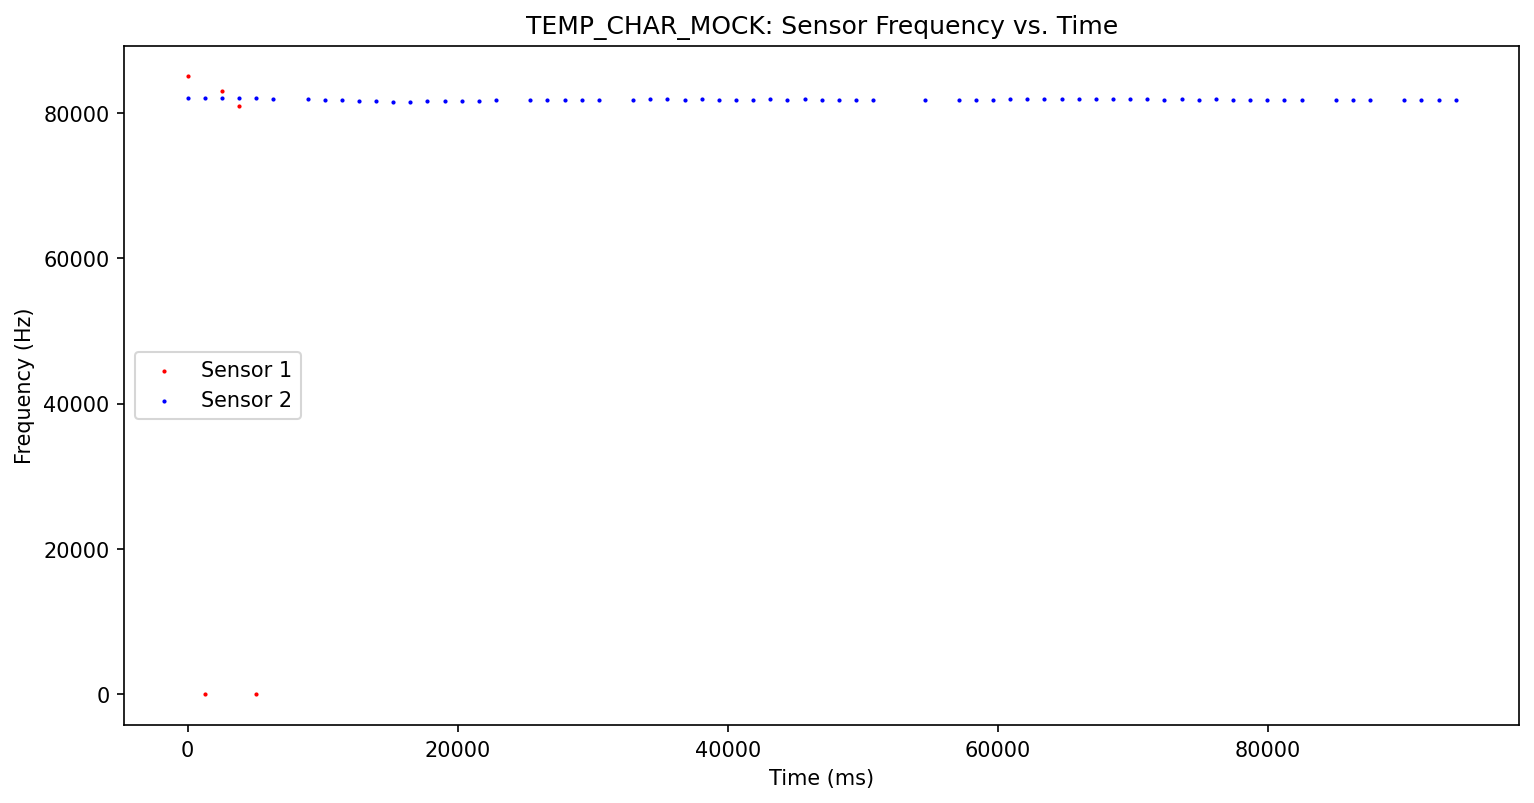

In [11]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(2.6e5,3.3e5)
#plt.xlim(ll_2,ul_2)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("TEMP_CHAR_MOCK: Sensor Frequency vs. Time")
plt.show()

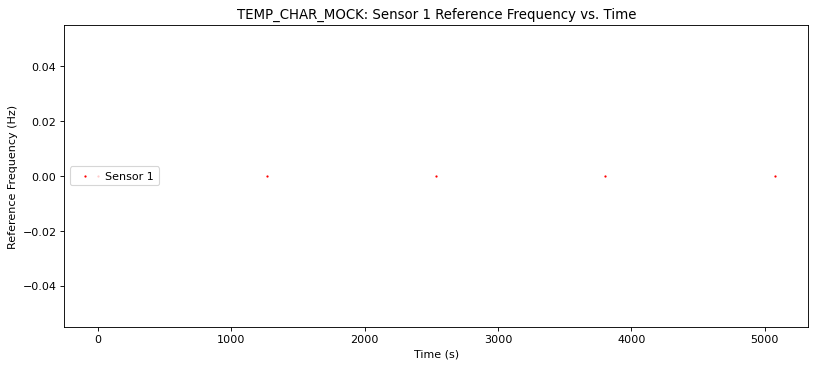

min:  0
max:  0
range:  0
mean:  0.0
standard deviation:  0.0


In [14]:
fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], s1[:,4],s=1, c='r', label = 'Sensor 1')
#plt.scatter(s2[1:,0], s2[1:,4],s=1,label = 'Sensor 2')
#plt.plot(B4_PRE_TEST[1:,0], B4_PRE_TEST[1:,4],"g-",label = 'Reference frequency')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("TEMP_CHAR_MOCK: Sensor 1 Reference Frequency vs. Time")
plt.show()
print('min: ',s1[:,4].min())
print('max: ',s1[:,4].max())
print('range: ',s1[:,4].max()-s1[:,4].min())
print('mean: ',s1[:,4].mean())
print('standard deviation: ',s1[:,4].std())

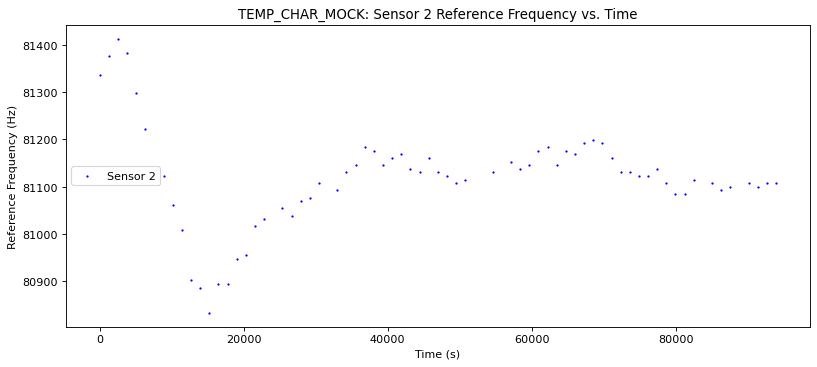

min:  80833
max:  81413
range:  580
mean:  81118.74626865672
standard deviation:  106.32635529049539


In [15]:
fig_ref_freq_s2 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s2[:,0], s2[:,4],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("TEMP_CHAR_MOCK: Sensor 2 Reference Frequency vs. Time")
plt.show()

print('min: ',s2[:,4].min())
print('max: ',s2[:,4].max())
print('range: ',s2[:,4].max()-s2[:,4].min())
print('mean: ',s2[:,4].mean())
print('standard deviation: ',s2[:,4].std())

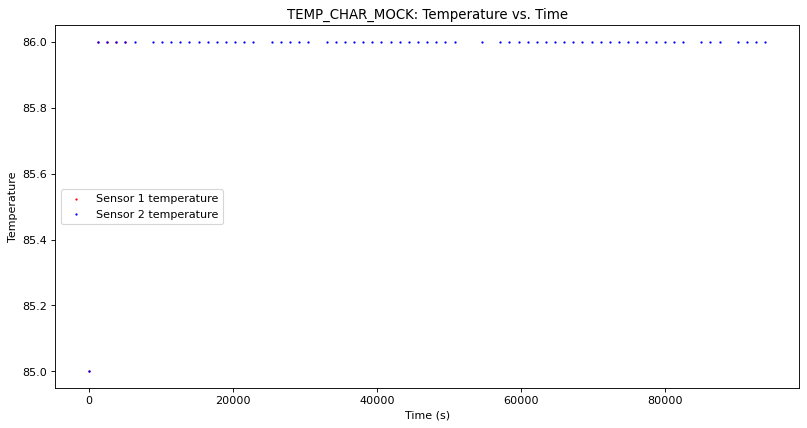

In [16]:
fig_temp = plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(s1[:,0], s1[:,2],s=1,c='r',label = 'Sensor 1 temperature')
plt.scatter(s2[:,0], s2[:,2],s=1,c='b',label = 'Sensor 2 temperature')

plt.xlabel('Time (s)')
plt.ylabel('Temperature')
plt.legend(loc="center left")
plt.title("TEMP_CHAR_MOCK: Temperature vs. Time")
plt.show()

In [16]:
s1[:,0].shape
        

(1388,)

In [28]:
#s1[(s1[:,0]> 3e5)]